In [16]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot') #makes the plot look nicer

# Let's read in the data and see what it looks like
df = pd.read_csv('autos.csv', encoding='latin-1')
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


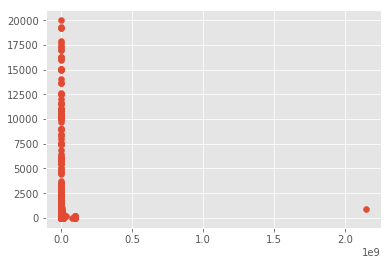

In [17]:
df = df[['dateCrawled', 'name', 'price', 'model', 'yearOfRegistration', 'kilometer', 'powerPS']]
df.head()

df.reset_index(inplace=True)
df.set_index("dateCrawled", inplace=True)

#Now let's look at price vs power at 20% opacity
plt.scatter(df['price'], df['powerPS'], alpha=1.0)

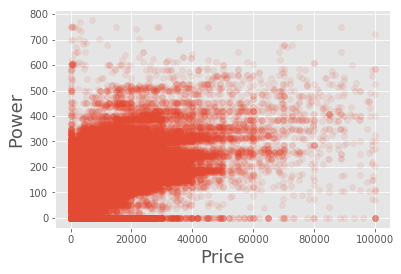

In [18]:
# Let's filter it down to cars that are less than 100k Euros = ~$120k USD
# 1 PS is about .98HP
df = df[df['price'] < 100000]
df = df[df['powerPS'] < 800]
plt.scatter(df['price'], df['powerPS'], alpha=0.1)
plt.xlabel('Price', fontsize=18)
plt.ylabel('Power', fontsize=18)

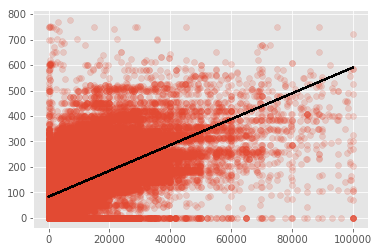

In [19]:
import numpy as np

# finds line of best fit (slope and y-intercept)
fit = np.polyfit(x=df['price'], y=df['powerPS'], deg=1)
m = fit[0]
b = fit[1]

# Same scatter plot
plt.scatter(df['price'], df['powerPS'], alpha=0.2)

# Add line of best fit (mx + b)
x = df['price']
y = m * x + b
plt.plot(x, y, color='black')

In [20]:
#What is the slope?
print(m)

0.00507134477313


In [21]:
# On Average, for every 1000 Euros you put into a car, 
print(m * 1000)
# You get 5.07 more PS

5.07134477313
